In [310]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

## Prepare Dataset

In [311]:
import time
np.random.seed(int (time.time())) 


one = np.concatenate((np.random.uniform(0, 1,10000).reshape((10000,1)), np.random.uniform(0, 1, 10000).reshape((10000,1)), np.zeros(10000).reshape((10000,1))), 1)
two = np.concatenate((np.random.uniform(-1, 0, 10000).reshape((10000,1)), np.random.uniform(0, 1, 10000).reshape((10000,1)), np.ones(10000).reshape((10000,1))), 1)
three = np.concatenate((np.random.uniform(-1, 0, 10000).reshape((10000,1)), np.random.uniform(-1, 0, 10000).reshape((10000,1)), np.zeros(10000).reshape((10000,1))), 1)
four = np.concatenate((np.random.uniform(0, 1, 10000).reshape((10000,1)), np.random.uniform(-1, 0, 10000).reshape((10000,1)), np.ones(10000).reshape((10000,1))), 1)


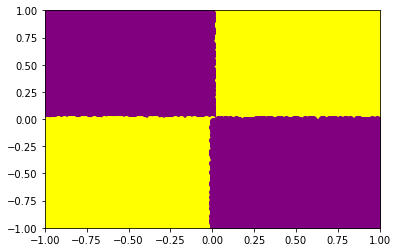

In [312]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)

scatter = plt.scatter(one[:,0], one[:,1], c='yellow')
scatter = plt.scatter(two[:,0], two[:,1], c='purple')
scatter = plt.scatter(three[:,0], three[:,1], c='yellow')
scatter = plt.scatter(four[:,0], four[:,1], c='purple')

plt.xticks(np.linspace(-1, 1, 9))
plt.yticks(np.linspace(-1, 1, 9))

plt.show()

In [313]:
data = np.concatenate((one, two, three, four), 0)
np.random.shuffle(data)

X = data[:, :2]
y = data[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Design Model

In [314]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier( solver='lbfgs', max_iter = 1000, hidden_layer_sizes=[12])
mlp.fit(X_train, y_train)

print("Training accuracy = ", mlp.score(X_train, y_train))
print("Test Accuracy = ", mlp.score(X_test, y_test))



Training accuracy =  0.9997
Test Accuracy =  0.9998


## Visualize lines

In [315]:
x_coefs = mlp.coefs_[0][0]
y_coefs = mlp.coefs_[0][1]
intercepts = mlp.intercepts_[0]

print(x_coefs)
print(intercepts)




[ 4.20140903e+01 -1.96631326e+01 -6.03623386e-02 -8.32844271e+01
 -5.91309030e+01 -1.16890399e+02  3.39406355e+01  7.08645581e-02
 -1.70785282e+01 -1.21997982e+01 -2.91459734e-01  6.13131491e+00]
[  2.07909175 -25.68565771  -0.64869487   1.42057322   4.48389951
   1.44413631   1.23290823  -0.43317528   4.18205096  -1.98566041
  -0.61048335  -9.04335292]


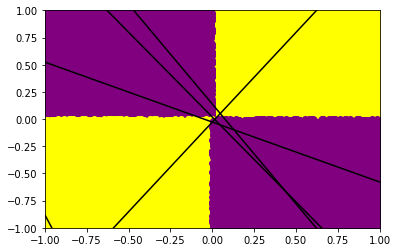

In [316]:
line = np.linspace(-1, 1)
rang = np.arange(len(x_coefs))

plt.xlim(-1, 1)
plt.ylim(-1, 1)

scatter = plt.scatter(one[:,0], one[:,1], c='yellow')
scatter = plt.scatter(two[:,0], two[:,1], c='purple')
scatter = plt.scatter(three[:,0], three[:,1], c='yellow')
scatter = plt.scatter(four[:,0], four[:,1], c='purple')

plt.xticks(np.linspace(-1, 1, 9))
plt.yticks(np.linspace(-1, 1, 9))

for i in range(6):
    plt.plot(line, -(line * x_coefs[i] + intercepts[i]) / y_coefs[i], c='black')

plt.show()

